In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Data"

accepted_2007_to_2018Q4.csv  rejected_2007_to_2018Q4.csv


In [ ]:
%cd /content/drive/My Drive/Data/

/content/drive/My Drive/Data


**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

#Filter the unwanted warning
import warnings
warnings.simplefilter("ignore")

In [ ]:
data = pd.read_csv("accepted_2007_to_2018Q4.csv")

In [ ]:
data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(2260701, 151)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [ ]:
#data['loan_status'].value_counts(dropna=False)

In [ ]:
[x for x in data.columns if 'fico' in x.lower()]

['fico_range_low',
 'fico_range_high',
 'last_fico_range_high',
 'last_fico_range_low',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high']

In [ ]:
pd.options.display.max_rows

60

In [ ]:
pd.options.display.max_rows = 1000

In [ ]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,Vice President,9 years,MORTGAGE,227000.0,Verified,Oct-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,NaN,907xx,CA,12.75,7.0,Feb-1995,705.0,709.0,1.0,9.0,NaN,5.0,0.0,8633.0,64.9,37.0,f,23252.59,23252.59,...,55970.0,28398.0,12300.0,42670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,Program Manager,6 years,RENT,110000.0,Not Verified,Oct-2016,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,334xx,FL,18.30,0.0,Jul-1999,660.0,664.0,0.0,67.0,72.0,10.0,1.0,17641.0,68.1,31.0,f,0.00,0.00,...,84664.0,62426.0,20700.0,58764.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,Customer Service Technician,10+ years,MORTGAGE,95000.0,Verified,Oct-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,NaN,770xx,TX,23.36,0.0,Jun-1996,660.0,664.0,1.0,37.0,NaN,8.0,0.0,7662.0,54.0,22.0,w,8456.12,8456.12,...,163804.0,44215.0,9500.0,34169.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260700,Total amount funded in policy code 2: 521953170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# To find no.of non-null (not missing) data points for each column
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #   Column                                      Non-Null Count    Dtype  
---  ------                                      --------------    -----  
 0   id                                          2260701 non-null  object 
 1   member_id                                   0 non-null        float64
 2   loan_amnt                                   2260668 non-null  float64
 3   funded_amnt                                 2260668 non-null  float64
 4   funded_amnt_inv                             2260668 non-null  float64
 5   term                                        2260668 non-null  object 
 6   int_rate                                    2260668 non-null  float64
 7   installment                                 2260668 non-null  float64
 8   grade                                       2260668 non-null  object 
 9   sub_grade                                   2260668 non-

In [ ]:
# Summary Statistics
data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,...,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,...,7.726402e+00,8.413439e+00,8.246523e+00,1.400463e+01,5.577951e+00,1.162813e+01,6.373958e-04,2.813652e-03,8.293767e-02,2.076755e+00,9.411458e+01,4.243513e+01,1.281935e-01,4.677109e-02,1.782428e+05,5.102294e+04,2.319377e+04,4.373201e+04,3.361728e+04,669.755603,673.755631,0.633256,1.538997,11.469455,58.169101,3.010554,12.533072,0.046352,0.077568,36.937928,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,3.301124e+01,8.859632e-01,2.190047e+01,26.464094,5.640861e+00,5.705150e-01,2.294831e+04,2.471307e+01,1.198753e+01,7.343239e+03,7.342333e+03,9.901383e+03,9.896992e+03,8.321852e+03,2.679738e+03,1.184159e+01,7.481640e+02,1.312256e+02,6.018248e+03,7.297044e+01,1.110976e+02,1.508131e-01,21.533121,0.0,7.416135e+04,7.822086,6.961656e-02,8.518462e+03,1.606926e+05,1.140700e+00,...,4.701430e+00,7.359114e+00,4.683928e+00,8.038868e+00,3.293434e+00,5.644027e+00,2.710643e-02,5.616522e-02,4.935732e-01,1.830711e+00,9.036140e+0

**Reducing the number of columns**

In [ ]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [ ]:
# Check how many of the columns are largely empty
# sort the columns by the percentage of data that is missing from each.
missing_data = data.isnull().mean().sort_values(ascending=False)*100
missing_data

member_id                                     100.000000
orig_projected_additional_accrued_interest     99.617331
hardship_loan_status                           99.517097
hardship_dpd                                   99.517097
hardship_reason                                99.517097
hardship_status                                99.517097
deferral_term                                  99.517097
hardship_amount                                99.517097
hardship_start_date                            99.517097
hardship_end_date                              99.517097
payment_plan_start_date                        99.517097
hardship_length                                99.517097
hardship_type                                  99.517097
hardship_payoff_balance_amount                 99.517097
hardship_last_payment_amount                   99.517097
settlement_percentage                          98.485160
debt_settlement_flag_date                      98.485160
settlement_status              

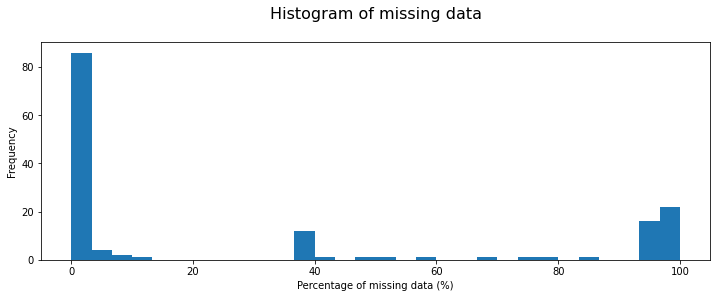

In [ ]:
%matplotlib inline
plt.figure(figsize=(12,4))
plt.title('Histogram of missing data\n', fontsize=16)
plt.xlabel('Percentage of missing data (%)')
plt.ylabel('Count')

# Setting the figure up:
missing_data.plot.hist(bins=30)

In [ ]:
drop_columns = sorted(list(missing_data[missing_data > 30].index))

In [ ]:
drop_columns

['all_util',
 'annual_inc_joint',
 'debt_settlement_flag_date',
 'deferral_term',
 'desc',
 'dti_joint',
 'hardship_amount',
 'hardship_dpd',
 'hardship_end_date',
 'hardship_last_payment_amount',
 'hardship_length',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_reason',
 'hardship_start_date',
 'hardship_status',
 'hardship_type',
 'il_util',
 'inq_fi',
 'inq_last_12m',
 'max_bal_bc',
 'member_id',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'next_pymnt_d',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'orig_projected_additional_accrued_interest',
 'payment_plan_start_date',
 'revol_bal_joint',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_earliest_cr_line',
 'sec_app_fico_range_high',
 'sec_app_fico_range_low',
 'sec_app_inq_last_6mths',
 'se

In [ ]:
# Check the length of columns to drop
print(len(drop_columns))

58


In [ ]:
# Drop the above 58 columns
data.drop(labels=drop_columns, axis=1, inplace=True)

In [ ]:
data.shape

(2260701, 93)

In [ ]:
data.isnull().sum()

id                                 0
loan_amnt                         33
funded_amnt                       33
funded_amnt_inv                   33
term                              33
int_rate                          33
installment                       33
grade                             33
sub_grade                         33
emp_title                     167002
emp_length                    146940
home_ownership                    33
annual_inc                        37
verification_status               33
issue_d                           33
loan_status                       33
pymnt_plan                        33
url                               33
purpose                           33
title                          23358
zip_code                          34
addr_state                        33
dti                             1744
delinq_2yrs                       62
earliest_cr_line                  62
fico_range_low                    33
fico_range_high                   33
i

In [ ]:
df = data.drop(['id','policy_code','out_prncp','out_prncp_inv','url','pymnt_plan','hardship_flag'], axis=1)
print(df.shape)

(2260701, 86)


36 columns dropped.
DROPPED COLUMNS


,count,mean,std,min,25%,50%,75%,max
tot_coll_amt,2190392.0,232.731739,8518.461819,0.0,0.0,0.0,0.00,9152545.0
tot_cur_bal,2190392.0,142492.195202,160692.640617,0.0,29092.0,79240.0,213204.00,9971659.0
total_rev_hi_lim,2190392.0,34573.942769,36728.495448,0.0,14700.0,25400.0,43200.00,9999999.0
acc_open_past_24mths,2210638.0,4.521656,3.164229,0.0,2.0,4.0,6.00,64.0
avg_cur_bal,2190322.0,13547.797509,16474.075010,0.0,3080.0,7335.0,18783.00,958084.0
bc_open_to_buy,2185733.0,11394.262688,16599.534400,0.0,1722.0,5442.0,14187.00,711140.0
bc_util,2184597.0,57.899948,28.583475,0.0,35.4,60.2,83.10,339.6
mo_sin_old_il_acct,2121597.0,125.737761,53.382175,0.0,96.0,130.0,154.00,999.0
mo_sin_old_rev_tl_op,2190391.0,181.491567,97.118454,1.0,116.0,164.0,232.00,999.0
mo_sin_rcnt_rev_tl_op,2190391.0,14.024089,17.533083,0.0,4.0,8.0,17.00,547.0


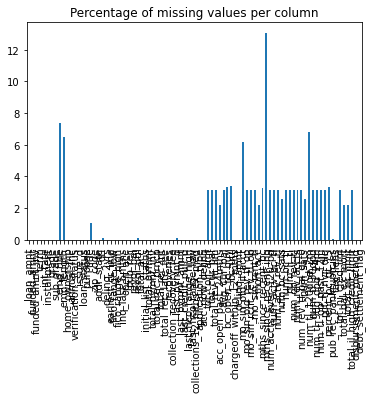

In [ ]:
# Columns with too many null values are dropped.
((df.isnull().sum())/len(df)*100).plot.bar(title='Percentage of missing values per column')

MAX_COL_PERC = 0.02

perc = df.isnull().sum() / len(df)     
na_cols = perc.iloc[np.where(np.array(perc)>MAX_COL_PERC)].index
print(len(na_cols), "columns dropped.")

print("DROPPED COLUMNS")
with pd.option_context('display.max_rows',None):
     display(df.loc[:,na_cols].describe().transpose())

df = df.drop(na_cols, axis=1)

In [ ]:
df.shape

(2260701, 50)

### There are a large number of current loans which are not relevant to our analysis, so I need to remove these from the dataset. We are only interested in loans that are overdue ('Charged Off') and loans that are fully paid ('Fully Paid')

In [ ]:
loans = df.loc[df['loan_status'].isin(['Fully Paid','Charged Off'])]
print("Number of loans: "+"{:,.0f}".format(len(loans)))

Number of loans: 1,345,310


In [ ]:
loans['loan_status'].value_counts(dropna=False)

Fully Paid     1076751
Charged Off     268559
Name: loan_status, dtype: int64

<p fontsize="5">Number of loans in the dataset is reduced to to 1.3m</p>

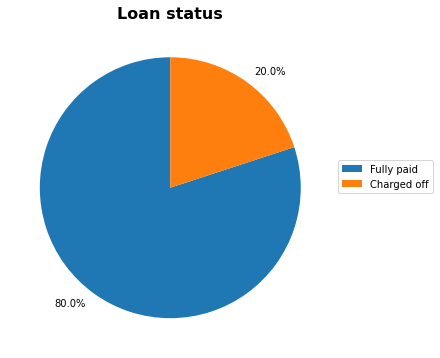

In [ ]:
chargeoffrate = loans['loan_status'].value_counts(normalize=True,dropna=False)
# Showing it visually in a pie chart; creating the labels for the chart:
labels = []
for i in chargeoffrate:
    labels.append(str(round(i*100,0))+"%")

# Creating the pie chart
plt.figure(figsize=(12,6))
plt.title('Loan status', fontsize=16, fontweight='bold');
plt.pie(chargeoffrate,labels=labels,startangle=90);
plt.legend(['Fully paid','Charged off'], loc='best', bbox_to_anchor=(1, 0.6));

In [ ]:
chargeoffamount = loans.groupby('loan_status').loan_amnt.sum().sort_values(ascending=False)

# Displaying the amounts in $bn 
print("Fully paid loans amount to $"+str(round(chargeoffamount[0]/1e9,1))+"bn")
print("Charged off loans amount to $"+str(round(chargeoffamount[1]/1e9,1))+"bn")

# Percentage of the charge off rate, i.e. the cost of risk (CoR)? 
Total_CoR = chargeoffamount[1]/loans['loan_amnt'].sum()
print("Life time cost of risk (CoR) is "+str(round(Total_CoR*100,1))+"%")

Fully paid loans amount to $15.2bn
Charged off loans amount to $4.2bn
Life time cost of risk (CoR) is 21.5%


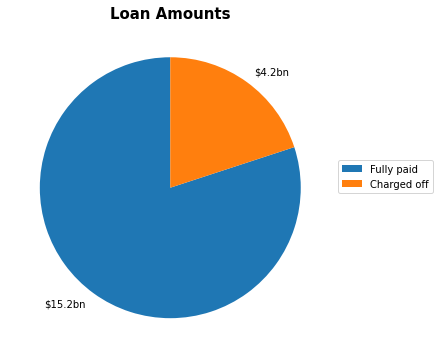

In [ ]:
l = []
for i in chargeoffamount:
    l.append('$'+str(round(i/1e9,1))+"bn")

# Creating the pie chart
plt.figure(figsize=(12,6))
plt.title('Loan Amounts', fontsize=15, fontweight='bold');
plt.pie(chargeoffrate,labels=l,startangle=90);
plt.legend(['Fully paid','Charged off'], loc='best', bbox_to_anchor=(1, 0.6));

<p fontsize="4">We observe that $4.2bn has been lost to customers by not repaying their loans.</p>



In [ ]:
# Calculate the average and weighted average interest rate
# pd.options.mode.chained_assignment = None
# loans['int_amnt'] = loans['int_rate']*loans['loan_amnt']
# weighted_avg_rate = loans['int_amnt'].sum()/loans['loan_amnt'].sum()

# print('Average Interest rate is: '+str(round(loans['int_rate'].mean(),2))+"%")
# print('Weighted Average rate is: '+str(round(weighted_avg_rate,2))+"%")

In [ ]:
print(loans.shape)
loans.head()

(1345310, 50)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,Cash,N
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,Joint App,0.0,0.0,0.0,0.0,0.0,Cash,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,Cash,N
5,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,debt_consolidation,Debt consolidation,300xx,GA,10.20,0.0,Oct-1987,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,May-2017,7653.56,May-2017,759.0,755.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,Cash,N


In [ ]:
loans.shape

(1345310, 50)

**Finding Unique Values**

In [ ]:
loans['grade'].unique()

array(['C', 'B', 'F', 'A', 'E', 'D', 'G'], dtype=object)

In [ ]:
# selecting only grade A loans:
loans[loans['grade'] == 'A'].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,235090.0,13892.350483,8068.238844,500.00,8000.000000,12000.000000,20000.000000,4.000000e+04
funded_amnt,235090.0,13882.628249,8069.188138,500.00,8000.000000,12000.000000,20000.000000,4.000000e+04
funded_amnt_inv,235090.0,13866.756903,8074.048992,0.00,7825.000000,12000.000000,19975.000000,4.000000e+04
int_rate,235090.0,7.113039,0.999755,5.31,6.490000,7.260000,7.890000,9.630000e+00
installment,235090.0,423.720573,246.640921,14.77,239.740000,368.720000,593.500000,1.268460e+03
annual_inc,235090.0,88957.119422,85061.319225,0.00,54000.000000,75000.000000,105000.000000,9.550000e+06
dti,235054.0,15.613592,8.988821,0.00,9.890000,14.970000,20.710000,9.990000e+02
delinq_2yrs,235090.0,0.190000,0.632828,0.00,0.000000,0.000000,0.000000,2.000000e+01
fico_range_low,235090.0,727.523587,36.799547,660.00,700.000000,720.000000,750.000000,8.450000e+02
fico_range_high,235090.0,731.524191,36.801483,664.00,704.000000,724.000000,754.000000,8.500000e+02


In [ ]:
loans['sub_grade'].unique()

array(['C4', 'C1', 'B4', 'F1', 'C3', 'B2', 'B1', 'A2', 'B5', 'C2', 'E2',
       'A4', 'E3', 'C5', 'A1', 'D4', 'F3', 'D1', 'B3', 'D3', 'D5', 'A5',
       'F2', 'E4', 'D2', 'E1', 'F5', 'E5', 'A3', 'G2', 'G1', 'G3', 'G4',
       'F4', 'G5'], dtype=object)

In [ ]:
loans['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [ ]:
np.sort(loans['grade'].unique())

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [ ]:
np.sort(loans['sub_grade'].unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [ ]:
data.isnull().sum()

id                                 0
loan_amnt                         33
funded_amnt                       33
funded_amnt_inv                   33
term                              33
int_rate                          33
installment                       33
grade                             33
sub_grade                         33
emp_title                     167002
emp_length                    146940
home_ownership                    33
annual_inc                        37
verification_status               33
issue_d                           33
loan_status                       33
pymnt_plan                        33
url                               33
purpose                           33
title                          23358
zip_code                          34
addr_state                        33
dti                             1744
delinq_2yrs                       62
earliest_cr_line                  62
fico_range_low                    33
fico_range_high                   33
i

In [ ]:
def missing_values(loans):
  missing_val = loans.isnull().sum()
  missing_val_percent = 100 * missing_val/len(loans)
  missing_val_table = pd.concat([missing_val, missing_val_percent], axis=1)
  missing_val_table_rename = missing_val_table.rename(columns={0:'Missing Values', 1:'% of Total Values'})
  missing_val_table_rename = missing_val_table_rename[missing_val_table_rename.iloc[:, 1] != 0].sort_values('% of Total Values', ascending=False).round(2)
  print('DataFrame contains ' + str(loans.shape[1]) + ' columns.\n' 'There are ' + str(missing_val_table_rename.shape[0]) + ' columns having missing values')
  return missing_val_table_rename

null_accepted = missing_values(loans)
null_accepted.head()

DataFrame contains 50 columns.
There are 11 columns having missing values


,Missing Values,% of Total Values
title,16659,1.24
last_pymnt_d,2313,0.17
revol_util,857,0.06
pub_rec_bankruptcies,697,0.05
dti,374,0.03


In [ ]:
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,Cash,N
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,Joint App,0.0,0.0,0.0,0.0,0.0,Cash,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,Cash,N
5,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,debt_consolidation,Debt consolidation,300xx,GA,10.20,0.0,Oct-1987,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,May-2017,7653.56,May-2017,759.0,755.0,0.0,Individual,0.0,0.0,0.0,0.0,0.0,Cash,N


In [ ]:
excluded_features = ['acc_now_delinq',  # won't know at time of the loan
                     #'acc_open_past_24mths',  # Lending Club metric
                     'application_type',  # Not relevant
                     #'bc_open_to_buy',  # Not relevant
                     'chargeoff_within_12_mths',  # Lending Club metric
                     'collection_recovery_fee',  # won't know at time of the loan
                     'debt_settlement_flag',  # won't know at time of the loan
                     'disbursement_method',  # irrelevant
                     'earliest_cr_line',  # relevance?
                     'fico_range_low',  # Credit score - defeats purpose of the exercise!
                     'fico_range_high',  # Credit score - defeats purpose of the exercise!
                     #'funded_amnt',  # won't know at time of the loan
                     #'funded_amnt_inv',  # won't know at time of the loan
                     #'hardship_flag',  # won't know at time of the loan
                     #'id',  # irrelevant
                     'initial_list_status',  # irrelevant
                     #'last_credit_pull_d',  # won't know at time of loan
                     'last_fico_range_high',  # won't know at time of loan
                     'last_fico_range_low',  # won't know at time of loan
                     #'last_pymnt_d',  # irrelevant
                     'last_pymnt_amnt',  # irrelevant
                     #'policy_code',  # irrelevant
                     #'pymnt_plan',  # won't know at time of loan
                     'recoveries',  # won't know at time of loan
                     #'out_prncp_inv',  # won't know at time of loan
                     #'out_prncp',  # won't know at time of loan
                     #'tot_hi_cred_lim',  # definition?
                     'title',  # irrelevant
                     #'total_pymnt',  # won't know at time of loan
                     #'total_pymnt_inv',  # won't know at time of loan
                     #'total_rec_int',  # won't know at time of loan
                     #'total_rec_late_fee',  # won't know at time of loan
                     #'total_rec_prncp',  # won't know at time of loan
                     #'total_rev_hi_lim',  # definition?
                     #'url',  # irrelevant
                     'collections_12_mths_ex_med'  # won't know at time of application
                    ]
len(excluded_features)

16

In [ ]:
pd.options.mode.chained_assignment = None
loans.drop(labels=excluded_features, axis=1, inplace=True)

In [ ]:
loans.shape

(1345310, 34)

In [ ]:
loans.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_credit_pull_d',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [ ]:
loans.drop_duplicates(subset=None,keep='first', inplace=True)
loans.duplicated().sum()

0

In [ ]:
loans.shape

(1345310, 34)

**Function to present initial findings for each variables**

In [ ]:
import matplotlib.ticker as mticker

def plot_var(col_name, full_name, df=loans, continuous=True, rotation=0, alignment='center'):
    """
    Visualises the distribution of a variable and assess its impact on success rate.
    - col_name (variable): variable name in the dataframe
    - full_name (string): full variable name for presentation purposes 
    - df (df): name of the dataframe
    - continuous (bool): True if the variable is continuous, and is set as True as default
    - rotation (int): rotation of the x axis labels 
    - alignment (string): alignment of the x axis labels and should be 'right' if rotating the labels
    - returns: two charts analysing the loan portfolio
    """
    
    # Set up figure space:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4), dpi=90)
    sn.set(palette='bright')
    
    # Set the font options for the x/y axes labels:
    #font.set_style('italic')
    
    # Plot distribution of the variable without showing charge off rate
    if continuous:
        # Show a histogram to visualise variable
        sn.histplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1, bins=30)
    else:
        x_labels = df[col_name].sort_values().unique()
        sn.countplot(x=df[col_name], order=sorted(df[col_name].unique()), ax=ax1).set_xticklabels(x_labels, rotation=rotation, horizontalalignment=alignment)
    
    # Formatting the x labels
    ax1.set_xlabel(full_name)
    
    # Formatting the y labels
    y_labels_1 = ['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000]
    ax1.yaxis.set_major_locator(mticker.FixedLocator(ax1.get_yticks().tolist()))
    ax1.set_yticklabels(y_labels_1)
    ax1.set_ylabel('Count')
    # Formatting the title
    ax1.set_title(full_name+"\n", fontweight='bold')

    # Plot distribution of variable split by loan status 
    if continuous:
        sn.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('Loan status')
        ax2.set_title(full_name + ' by loan status'+"\n", fontweight='bold')
    else:
        charge_off_rates = df.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sn.barplot(x=charge_off_rates.index, y=charge_off_rates.values, ax=ax2)
        
        # Formatting the x-axis
        ax2.set_xticklabels(charge_off_rates.index,rotation=rotation, horizontalalignment=alignment)
        
        # Formatting the y-axis
        y_labels_2 = ['{:,.0f}'.format(x) + '%' for x in ax2.get_yticks()*100]
        ax2.yaxis.set_major_locator(mticker.FixedLocator(ax2.get_yticks().tolist()))
        ax2.set_yticklabels(y_labels_2)
        ax2.set_ylabel('Proportion of loans charged off')

        # Formatting the title 
        ax2.set_title('Charge off rate by ' + full_name+"\n", fontweight='bold')
    
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

**Dependent/Lending Club variables**

### Interest Rate

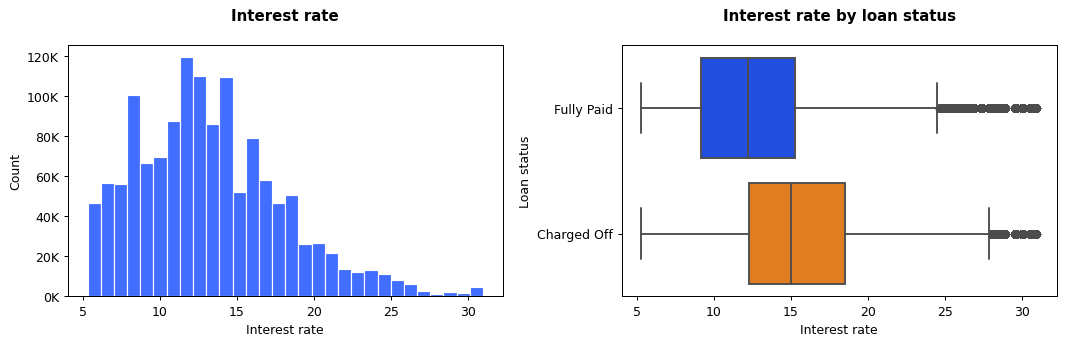

In [ ]:
plot_var('int_rate', 'Interest rate', loans) 

### the charge off rate increases based on the interest rate offered to the borrower, as the interest rate is driven by Lending Club's assessment of applicant risk 

### Investment grade and sub-grade

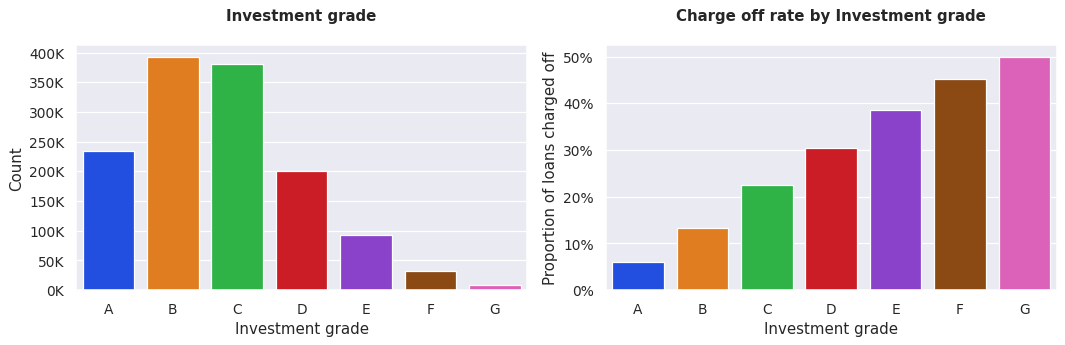

In [ ]:
plot_var('grade','Investment grade',continuous=False)

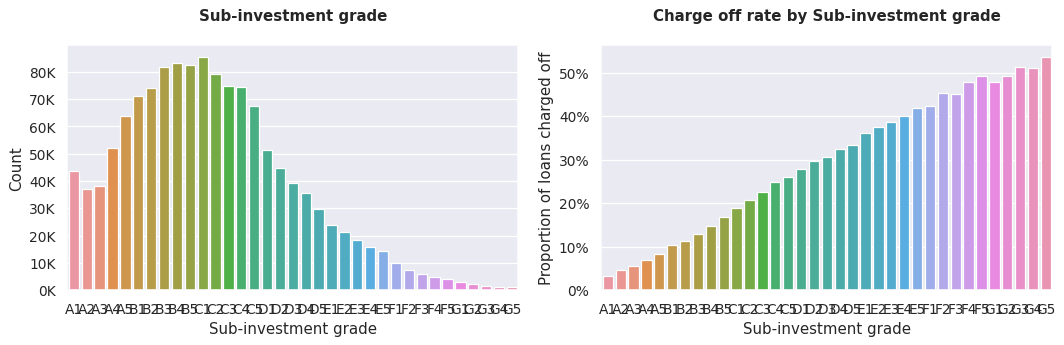

In [ ]:
plot_var('sub_grade','Sub-investment grade',continuous=False)

### Charge off rate increases as the applicant's grade falls, meaning that Lending Club's underwriting models are clearly a good predictor of creditworthiness

**Independent variables**

### Loan amount

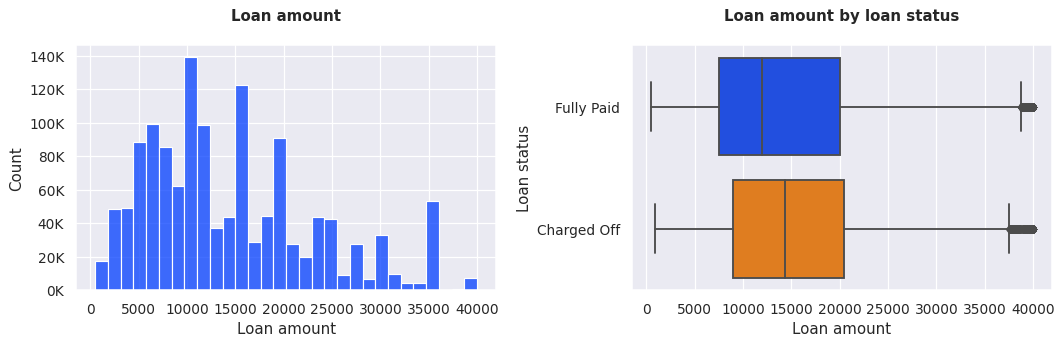

In [ ]:
plot_var('loan_amnt', 'Loan amount')

### loan amount is a key driver of charge off rate.

### Term

In [ ]:
loans['term'] = loans.term.map({' 36 months': 36, ' 60 months': 60})

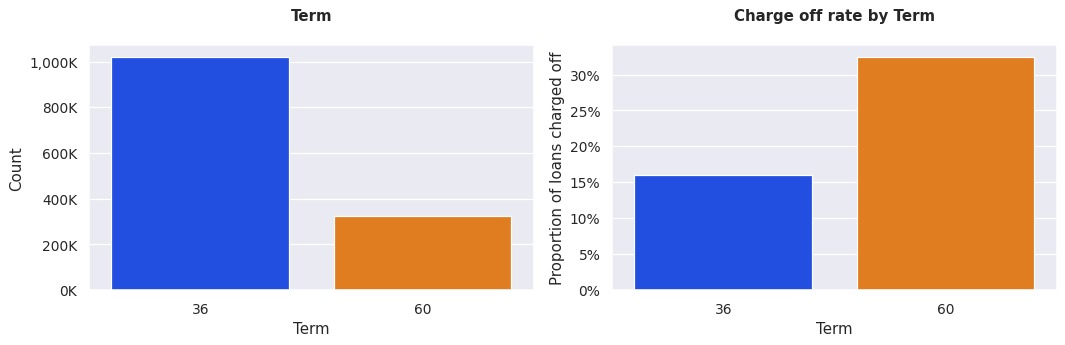

In [ ]:
plot_var('term', 'Term', continuous=False)

### Term is also a key driver of risk. This is due to a longer term leaving a longer period for the borrower to fall into financial difficulty.

In [ ]:
loans.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   1
addr_state                 0
dti                      374
delinq_2yrs                0
inq_last_6mths             1
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util               857
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
last_pymnt_d            2313
last_credit_pull_d        55
delinq_amnt                0
pub_rec_bankruptcies     697
tax_liens                 39
dtype: int64

**Data Preprocessing**

### To show Categorical Attributes

In [ ]:
with pd.option_context('display.max_rows',None):
    display(loans.describe(include=np.object).transpose())

,count,unique,top,freq
grade,1345310,7,B,392741
sub_grade,1345310,35,C1,85494
home_ownership,1345310,6,MORTGAGE,665579
verification_status,1345310,3,Source Verified,521273
issue_d,1345310,139,Mar-2016,48937
loan_status,1345310,2,Fully Paid,1076751
purpose,1345310,14,debt_consolidation,780321
zip_code,1345309,943,945xx,15005
addr_state,1345310,51,CA,196528
last_pymnt_d,1342997,135,Aug-2018,39615


### Transform the date fields to numerical to capture ordering in time.

In [ ]:
date_fields = ['issue_d', 'last_pymnt_d','last_credit_pull_d']
for col in date_fields:  
    loans[col] = pd.to_datetime(loans[col]) 
    loans[col + '_month'] = loans[col].dt.month
    loans[col + '_year'] = loans[col].dt.year
loans = loans.drop(date_fields, axis=1)

### Transform the categorical variables into dummy-variables using one-hot encoding. Missing values are given a separate value.

In [ ]:
cat = loans.select_dtypes(include=['object']).columns
loans[cat] = loans[cat].fillna(value='Missing')
loans_cat = pd.get_dummies(data=loans[cat])

### Remove least frequent categories

In [ ]:
# # We only care about categories that occur in more than MIN_DUMMY_PERC% of the data.
# MIN_DUMMY_PERC = 0.01

# print("Total no.of categorical columns: ", len(loans_cat.columns))
# loans_cat = loans_cat.drop([col for col, cnt in loans_cat.sum().iteritems() if cnt < MIN_DUMMY_PERC*len(loans_cat)], axis=1)
# print("Reduced no.of categorical columns: ", len(loans_cat.columns))

In [ ]:
loans.shape

(1345310, 37)

### numerical attributes are dispalyed below

In [ ]:
# with pd.option_context('display.max_rows',None):
#     display(df.describe().transpose().apply(lambda s: s.apply('{0:.5f}'.format)))

In [ ]:
# Distribution of different type of amount
# fig , ax = plt.subplots(1,3,figsize = (12,5))

# loan_amount = loans.loan_amnt.values
# funded_amount = loans.funded_amnt.values
# investor_funds = loans.funded_amnt_inv.values

# sn.distplot(loan_amount , ax = ax[0] , color = 'blue').set_title('Loan Applied by the Borrower' , fontsize = 14)
# sn.distplot(funded_amount , ax = ax[1] , color = 'cyan').set_title('Amount funded by the Lender' , fontsize = 14)
# sn.distplot(investor_funds , ax = ax[2] , color = 'purple').set_title('Total Commited by Investors' , fontsize = 14)

# plt.show()

**Rejected DataSet**

In [ ]:
data_reject = pd.read_csv('rejected_2007_to_2018Q4.csv')

In [ ]:
data_reject.shape

(27648741, 9)

In [ ]:
data_reject.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [ ]:
data_reject.isnull().sum()

Amount Requested               0
Application Date               0
Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Zip Code                     293
State                         22
Employment Length         951355
Policy Code                  918
dtype: int64

In [ ]:
data_reject.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [ ]:
data_reject.tail()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
27648736,10000.0,2016-12-31,Debt consolidation,590.0,41.26%,441xx,OH,< 1 year,0.0
27648737,10000.0,2016-12-31,moving,NaN,1.48%,207xx,MD,5 years,0.0
27648738,1200.0,2016-12-31,Other,686.0,10.26%,914xx,CA,< 1 year,0.0
27648739,25000.0,2016-12-31,debt_consolidation,NaN,17.71%,880xx,NM,< 1 year,0.0
27648740,15000.0,2016-12-31,Business,684.0,10.58%,113xx,NY,< 1 year,0.0


In [ ]:
data_reject.columns

Index(['Amount Requested', 'Application Date', 'Loan Title', 'Risk_Score',
       'Debt-To-Income Ratio', 'Zip Code', 'State', 'Employment Length',
       'Policy Code'],
      dtype='object')

In [ ]:
data_reject.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Non-Null Count     Dtype  
---  ------                --------------     -----  
 0   Amount Requested      27648741 non-null  float64
 1   Application Date      27648741 non-null  object 
 2   Loan Title            27647438 non-null  object 
 3   Risk_Score            9151111 non-null   float64
 4   Debt-To-Income Ratio  27648741 non-null  object 
 5   Zip Code              27648448 non-null  object 
 6   State                 27648719 non-null  object 
 7   Employment Length     26697386 non-null  object 
 8   Policy Code           27647823 non-null  float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


In [ ]:
data_reject.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount Requested,27648741.0,13133.240309,15009.636325,0.0,4800.0,10000.0,20000.0,1400000.0
Risk_Score,9151111.0,628.172090,89.936793,0.0,591.0,637.0,675.0,990.0
Policy Code,27647823.0,0.006375,0.112737,0.0,0.0,0.0,0.0,2.0


In [ ]:
null_values_reject = missing_values(data_reject)
null_values_reject.head()

DataFrame contains 9 columns.
There are 6 columns having missing values


,Missing Values,% of Total Values
Risk_Score,18497630,66.90
Employment Length,951355,3.44
Loan Title,1303,0.00
Policy Code,918,0.00
Zip Code,293,0.00


In [ ]:
bool_series = pd.isnull(data_reject["Risk_Score"])
data_reject[bool_series] .head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
132,3000.0,2007-06-09,lmhsfan,NaN,9.26%,805xx,CO,< 1 year,0.0
160,12000.0,2007-06-12,Tony_Texan,NaN,100%,802xx,CO,< 1 year,0.0
205,4000.0,2007-06-19,ThePegLeg,NaN,100%,796xx,TX,< 1 year,0.0
310,1000.0,2007-06-27,Help rebuild Galveston,NaN,100%,701xx,TX,10+ years,0.0
543,7500.0,2007-07-23,Sm-biz owner seeks loan,NaN,100%,891xx,NV,3 years,0.0


In [ ]:
new_data1 = data_reject.dropna(axis = 0, how ='any')  
new_data1.shape

(8992195, 9)

In [ ]:
print("Old data frame length:", len(data_reject)) 
print("New data frame length:", len(new_data1))  
print("Number of rows with at least 1 NA value: ", (len(data_reject)-len(new_data1))) 

Old data frame length: 27648741
New data frame length: 8992195
Number of rows with at least 1 NA value:  18656546


In [ ]:
new_data1.isnull().sum()

Amount Requested        0
Application Date        0
Loan Title              0
Risk_Score              0
Debt-To-Income Ratio    0
Zip Code                0
State                   0
Employment Length       0
Policy Code             0
dtype: int64

In [ ]:
def removeNulls(dataframe, axis =1, percent=0.3):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.3(30%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
         
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

In [ ]:
data_reject = removeNulls(data_reject, axis =1,percent = 0.3)

Number of Columns dropped	:  1

Old dataset rows,columns (27648741, 9) 
New dataset rows,columns (27648741, 8)


In [ ]:
data_reject = removeNulls(data_reject, axis =0,percent = 0.3)